# July 2

In [50]:
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
# %matplotlib notebook
import gmshparser
import itertools

In [11]:
mesh = gmshparser.parse("transfinite_test.msh") 
#replace file location here, 
# "pyramid.msh"
# "cube_transfinite_3.msh"
# "cube_transfinite_dense.msh"


print(mesh) # mesh object contains all info

Mesh name: transfinite_test.msh
Mesh version: 4.1
Number of nodes: 45
Minimum node tag: 1
Maximum node tag: 45
Number of node entities: 27
Number of elements: 216
Minimum element tag: 1
Maximum element tag: 216
Number of element entities: 27


# primal mesh

In [12]:
import numpy as np

node_dict = {}
"""
key: node_id (int)
value: node_coords (array of floats)
"""

for entity in mesh.get_node_entities():
    for node in entity.get_nodes():
        node_id = node.get_tag()
        node_coords = node.get_coordinates()
        node_dict[node_id] = np.array(node_coords) # create dict of nodes, key is id, value is coordinate
        # print("Node id = %s, node coordinates = %s" % (nid, ncoords))

node_dict

{1: array([-0.5, -0.5,  0.5]),
 2: array([ 0.5, -0.5,  0.5]),
 3: array([ 0.5, -0.5, -0.5]),
 4: array([-0.5, -0.5, -0.5]),
 5: array([-0.5,  0.5,  0.5]),
 6: array([0.5, 0.5, 0.5]),
 7: array([ 0.5,  0.5, -0.5]),
 8: array([-0.5,  0.5, -0.5]),
 9: array([-1.37512224e-12, -5.00000000e-01,  5.00000000e-01]),
 10: array([ 5.00000000e-01, -5.00000000e-01,  1.37512224e-12]),
 11: array([ 1.37512224e-12, -5.00000000e-01, -5.00000000e-01]),
 12: array([-5.00000000e-01, -5.00000000e-01, -1.37512224e-12]),
 13: array([-1.37512224e-12,  5.00000000e-01,  5.00000000e-01]),
 14: array([5.00000000e-01, 5.00000000e-01, 1.37512224e-12]),
 15: array([ 1.37512224e-12,  5.00000000e-01, -5.00000000e-01]),
 16: array([-5.00000000e-01,  5.00000000e-01, -1.37512224e-12]),
 17: array([-5.00000000e-01, -1.37512224e-12,  5.00000000e-01]),
 18: array([-5.00000000e-01, -1.37512224e-12, -5.00000000e-01]),
 19: array([ 5.00000000e-01, -1.37512224e-12,  5.00000000e-01]),
 20: array([ 5.00000000e-01, -1.37512224e-12

In [13]:
tetrahedron_dict = {}
"""
key: tetrahedron_id (int)
value: node_ids (array of ints)
"""
for entity in mesh.get_element_entities():
    el_type = entity.get_element_type()
    if el_type == 4:
        for element in entity.get_elements():
            el_id = element.get_tag()
            el_con = element.get_connectivity()
            tetrahedron_dict[el_id] = np.array(el_con)

tetrahedron_dict

{109: array([21, 40, 24, 45]),
 110: array([42, 23, 44, 45]),
 111: array([27, 29, 31, 45]),
 112: array([33, 26, 25, 45]),
 113: array([44, 23, 30, 45]),
 114: array([21, 34, 40, 45]),
 115: array([27, 43, 29, 45]),
 116: array([33, 25, 39, 45]),
 117: array([38, 24, 40, 45]),
 118: array([26, 33, 35, 45]),
 119: array([42, 23, 45, 22]),
 120: array([42, 35, 36, 45]),
 121: array([41, 35, 42, 45]),
 122: array([27, 31, 28, 45]),
 123: array([24, 30, 23, 45]),
 124: array([12, 21, 40, 24]),
 125: array([36, 22, 42, 45]),
 126: array([29, 31, 13, 27]),
 127: array([33, 25, 26, 15]),
 128: array([41, 26, 35, 45]),
 129: array([26, 41, 43, 45]),
 130: array([42, 23, 22, 10]),
 131: array([43, 44, 30, 45]),
 132: array([36, 34, 22, 45]),
 133: array([21, 22, 34, 45]),
 134: array([32, 30, 24, 45]),
 135: array([39, 34, 33, 45]),
 136: array([39, 40, 34, 45]),
 137: array([29, 43, 30, 45]),
 138: array([28, 37, 39, 45]),
 139: array([28, 39, 25, 45]),
 140: array([32, 24, 38, 45]),
 141: ar

In [14]:
tetrahedron_volume_dict = {}
"""
key: tetrahedron_id (int)
value: volume of tetrahedron (float)
"""
def tetrahedron_volume(tetrahedron_id):
    # get coordinates of nodes
    nodes = tetrahedron_dict[tetrahedron_id]
    x1 = node_dict[nodes[0]][0]
    y1 = node_dict[nodes[0]][1]
    z1 = node_dict[nodes[0]][2]
    x2 = node_dict[nodes[1]][0]
    y2 = node_dict[nodes[1]][1]
    z2 = node_dict[nodes[1]][2]
    x3 = node_dict[nodes[2]][0]
    y3 = node_dict[nodes[2]][1]
    z3 = node_dict[nodes[2]][2]
    x4 = node_dict[nodes[3]][0]
    y4 = node_dict[nodes[3]][1]
    z4 = node_dict[nodes[3]][2]
    # use cross-product formula to get volume
    """
    https://keisan.casio.com/has10/SpecExec.cgi?path=05000000.Mathematics/01000600.Space%2520geometry/10000300.Volume%
    2520of%2520a%2520tetrahedron%2520and%2520a%2520parallelepiped/default.xml&charset=utf-8
    """
    volume = 1/6 * (
        (x4-x1)*((y2-y1)*(z3-z1)-(z2-z1)*(y3-y1)) +
        (y4-y1)*((z2-z1)*(x3-x1)-(x2-x1)*(z3-z1)) +
        (z4-z1)*((x2-x1)*(y3-y1)-(y2-y1)*(x3-x1))
    )
    return volume

for tetrahedron_id in tetrahedron_dict:
    tetrahedron_volume_dict[tetrahedron_id] = tetrahedron_volume(tetrahedron_id)
    
tetrahedron_volume_dict

{109: 0.012359275268061224,
 110: 0.010895996217847545,
 111: 0.011402778230058795,
 112: 0.01060252490141576,
 113: 0.014361348313459015,
 114: 0.013835114065446826,
 115: 0.01335409300265088,
 116: 0.012684922589251458,
 117: 0.014199896696366315,
 118: 0.015258756192942017,
 119: 0.014527994957123026,
 120: 0.013369737714920582,
 121: 0.012602365169728225,
 122: 0.014257640795448178,
 123: 0.01351241314729074,
 124: 0.005859375000009848,
 125: 0.016545100976204586,
 126: 0.005670575289262077,
 127: 0.005445593415951522,
 128: 0.01532858487623712,
 129: 0.013297142776109072,
 130: 0.007324218749986573,
 131: 0.0131104455499306,
 132: 0.012511542700944237,
 133: 0.013389093793037044,
 134: 0.01185233528070532,
 135: 0.012391587681733453,
 136: 0.013198115648088326,
 137: 0.01239732574667533,
 138: 0.012647985387768512,
 139: 0.01344625454433455,
 140: 0.015579774435355683,
 141: 0.011888371398457373,
 142: 0.01441950394204738,
 143: 0.011790838040179951,
 144: 0.012938823483098343,
 1

In [15]:
face_dict = {}
"""
key: (node_id 1, node_id 2, node_id 3) (tuple of int)
    - nodes that make up the face in ascending order of node id, with 
    - the ordering defining an orientation according to right hand rule
value: [tetrahedron_id 1, tetrahedron_id 2] (array of int)
    - all tetrahedrons that share this face. If the face is shared, len of array is 2, 
    - and face corresponds uniquely to a dual edge
    - Otherwise, if face is not shared (i.e. it is on the boundary of primal mesh) len of array of 1.
"""
# import itertools

for tetrahedron_id in tetrahedron_dict:
    
    # get nodes that make up tetrahedron
    tetrahedron_nodes = tetrahedron_dict[tetrahedron_id]
    
    # for a tetrahedron, any subset of 3 nodes of 4 form a valid face
    faces = list(itertools.combinations(tetrahedron_nodes, 3)) 
    
    value = tetrahedron_id
    
    for face in faces:
        
        key = list(face) # tuple is immutable, so need to first convert to list, sort, then convert back
        key.sort() # sorts in place, by ascending order
        key = tuple(key)
        
        # if face exists in dict
        if key in face_dict:
            face_dict[key] = np.append(face_dict[key], value) 
        """
        Note, here we use np.append, which is much slower than list append
        """
        
        # otherwise, start a new array 
        else: 
            face_dict[key] = np.array([value])

face_dict

{(21, 24, 40): array([109, 124]),
 (21, 40, 45): array([109, 114]),
 (21, 24, 45): array([109, 141]),
 (24, 40, 45): array([109, 117]),
 (23, 42, 44): array([110, 158]),
 (23, 42, 45): array([110, 119]),
 (42, 44, 45): array([110, 153]),
 (23, 44, 45): array([110, 113]),
 (27, 29, 31): array([111, 126]),
 (27, 29, 45): array([111, 115]),
 (27, 31, 45): array([111, 122]),
 (29, 31, 45): array([111, 156]),
 (25, 26, 33): array([112, 127]),
 (26, 33, 45): array([112, 118]),
 (25, 33, 45): array([112, 116]),
 (25, 26, 45): array([112, 154]),
 (23, 30, 44): array([113, 178]),
 (30, 44, 45): array([113, 131]),
 (23, 30, 45): array([113, 123]),
 (21, 34, 40): array([114, 183]),
 (21, 34, 45): array([114, 133]),
 (34, 40, 45): array([114, 136]),
 (27, 29, 43): array([115, 182]),
 (27, 43, 45): array([115, 143]),
 (29, 43, 45): array([115, 137]),
 (25, 33, 39): array([116, 185]),
 (33, 39, 45): array([116, 135]),
 (25, 39, 45): array([116, 139]),
 (24, 38, 40): array([117, 152]),
 (24, 38, 45):

In [16]:
face_area_dict = {}
"""
key: (node_id 1, node_id 2, node_id 3) (tuple of int)
    - nodes that make up the face in ascending order of node id, with 
    - the ordering defining an orientation according to right hand rule
value: face_area (array of int)
    - area of face (float)
"""

def triangle_area(tuple_of_node_id):
    node1 = node_dict[(tuple_of_node_id)[0]]
    node2 = node_dict[(tuple_of_node_id)[1]]
    node3 = node_dict[(tuple_of_node_id)[2]]
    side1 = node2 - node1
    side2 = node3 - node1
    side1x = side1[0]
    side1y = side1[1]
    side1z = side1[2]
    side2x = side2[0]
    side2y = side2[1]
    side2z = side2[2]
    area = 0.5 * np.sqrt(
        (side1y*side2z - side1z*side2y)**2 +
        (side1z*side2x - side1x*side2z)**2 +
        (side1x*side2y - side1y*side2x)**2
    )
    return area

for face in face_dict:
    face_area_dict[face] =  triangle_area(face)

face_area_dict

{(21, 24, 40): 0.0782362324892647,
 (21, 40, 45): 0.10832302796331464,
 (21, 24, 45): 0.11248440541912431,
 (24, 40, 45): 0.14266177258275187,
 (23, 42, 44): 0.06962246858385905,
 (23, 42, 45): 0.141071996842358,
 (42, 44, 45): 0.09463105240816312,
 (23, 44, 45): 0.11161404628493209,
 (27, 29, 31): 0.07484307147335824,
 (27, 29, 45): 0.10657812129872364,
 (27, 31, 45): 0.1362906430074793,
 (29, 31, 45): 0.10207324633326922,
 (25, 26, 33): 0.0702382057217055,
 (26, 33, 45): 0.1390522329829904,
 (25, 33, 45): 0.10407599354577833,
 (25, 26, 45): 0.10204504456397168,
 (23, 30, 44): 0.08645060554502257,
 (30, 44, 45): 0.12027403868195927,
 (23, 30, 45): 0.1205435216668292,
 (21, 34, 40): 0.0818217190065023,
 (21, 34, 45): 0.12194820383781824,
 (34, 40, 45): 0.12128039246135945,
 (27, 29, 43): 0.07904758959307145,
 (27, 43, 45): 0.11617506180705064,
 (29, 43, 45): 0.11698494646600512,
 (25, 33, 39): 0.07411902000012734,
 (33, 39, 45): 0.11656437739487549,
 (25, 39, 45): 0.1150423886829727,
 

In [17]:
edge_dict = {}
"""
key: (node_id 1, node_id 2) (tuple of int)
    - nodes that make up the edge in ascending order of node id, with the ordering defining a direction
value: [tetrahedron_id 1, tetrahedron_id 2, ...] (array of int)
    - all tetrahedrons that share the edge. Note, it is possible for an edge to belong to more than 2 tets.
    - Note: an edge may belong to just one tet, but it always belongs to at least two faces.
"""
# import itertools

for face_id in face_dict:
    
    """
    any subset of 2 vertices of 3 nodes of a triangle form a valid edge
    """
    edges = list(itertools.combinations(face_id, 2)) 
    
    values = face_dict[face_id] # all tetrahedrons that share this face
        
    for edge in edges:
        
        key = list(edge) # tuple is immutable, so need to convert to list first and sort, then convert back
        key.sort() # sorts in place, puts nodes of edge in ascending order
        """
        Note: it may be more efficient to reverse the order if not already sorted
        """
        key = tuple(key)
        
        for value in values:
            if key in edge_dict:
                if value not in edge_dict[key]:
                    edge_dict[key] = np.append(edge_dict[key], value)
                # if a tet is already in the array of tets which an edge belongs to, don't need to do anything
            else: 
                edge_dict[key] = np.array([value]) 
edge_dict

{(21, 24): array([109, 124, 141]),
 (21, 40): array([109, 124, 114, 183, 208]),
 (24, 40): array([109, 124, 117, 152]),
 (21, 45): array([109, 114, 141, 133]),
 (40, 45): array([109, 114, 117, 136, 169]),
 (24, 45): array([109, 141, 117, 140, 123, 134, 147]),
 (23, 42): array([110, 158, 119, 130]),
 (23, 44): array([110, 158, 113, 178, 206]),
 (42, 44): array([110, 158, 153]),
 (23, 45): array([110, 119, 113, 123, 147]),
 (42, 45): array([110, 119, 153, 125, 120, 121, 146]),
 (44, 45): array([110, 153, 113, 131]),
 (27, 29): array([111, 126, 115, 182, 204]),
 (27, 31): array([111, 126, 122, 150]),
 (29, 31): array([111, 126, 156]),
 (27, 45): array([111, 115, 122, 143, 177]),
 (29, 45): array([111, 115, 156, 137]),
 (31, 45): array([111, 122, 156, 142, 145, 144, 176]),
 (25, 26): array([112, 127, 154]),
 (25, 33): array([112, 127, 116, 185, 207]),
 (26, 33): array([112, 127, 118, 148]),
 (26, 45): array([112, 118, 154, 128, 129, 143, 177]),
 (33, 45): array([112, 118, 116, 135, 151]),


In [18]:
edge_length_dict = {}
"""
key: (node_id 1, node_id 2) (tuple of int)
    - nodes that make up the edge in ascending order of node id, with the ordering defining a direction
value: length of edge (float)
"""

def edge_length(edge_id):
    node1 = node_dict[(edge_id)[0]]
    node2 = node_dict[(edge_id)[1]]
    node1x = node1[0]
    node1y = node1[1]
    node1z = node1[2]
    node2x = node2[0]
    node2y = node2[1]
    node2z = node2[2]
    length = np.sqrt(
        (node2x - node1x)**2 + (node2y - node1y)**2 + (node2z - node1z)**2
    )
    return length

for edge_id in edge_dict:
    edge_length_dict[edge_id] = edge_length(edge_id)

edge_length_dict

{(21, 24): 0.41546967551137987,
 (21, 40): 0.3775951866757337,
 (24, 40): 0.5811851547324093,
 (21, 45): 0.621640117550733,
 (40, 45): 0.5901935583322029,
 (24, 45): 0.5525658031208311,
 (23, 42): 0.5812836011795245,
 (23, 44): 0.3977475644181927,
 (42, 44): 0.35630482034271926,
 (23, 45): 0.5968577847543437,
 (42, 45): 0.5388178263754393,
 (44, 45): 0.5940185074760046,
 (27, 29): 0.38447364261902295,
 (27, 31): 0.5768188836634047,
 (29, 31): 0.39149468872748905,
 (27, 45): 0.5785072424765115,
 (29, 45): 0.5961884420567243,
 (31, 45): 0.5314297720009782,
 (25, 26): 0.39528470752104744,
 (25, 33): 0.36187516786393326,
 (26, 33): 0.5840909810493246,
 (26, 45): 0.5227469448904148,
 (33, 45): 0.6019568550793112,
 (25, 45): 0.6040429207634206,
 (23, 30): 0.4780330793983122,
 (30, 44): 0.4780330793993742,
 (30, 45): 0.5287511207407696,
 (21, 34): 0.4677071733456401,
 (34, 40): 0.4780330793993742,
 (34, 45): 0.5372693142483878,
 (27, 43): 0.4560836863706492,
 (29, 43): 0.45179441996726477,
 (

# dual mesh

In [19]:
dual_node_dict = {}
"""
key: tetrahedron_id (int)
value: coordinates of the circumcenter of the tetrahedron (array of floats)
    - the circumcenter is calculated according to the formula:
    - http://rodolphe-vaillant.fr/entry/127/find-a-tetrahedron-circumcenter
    - Note: coordinates can lie outside the tet itself (whenever at least one angle is obtuse)
"""

def circumcenter(tetrahedron_id):
    nodes = tetrahedron_dict[tetrahedron_id]
    v0 = node_dict[nodes[0]]
    v1 = node_dict[nodes[1]] 
    v2 = node_dict[nodes[2]] 
    v3 = node_dict[nodes[3]]
    v1_minus_v0 = v1-v0
    v2_minus_v0 = v2-v0 
    v3_minus_v0 = v3-v0
    A = np.matrix([v1_minus_v0, v2_minus_v0, v3_minus_v0])
    
    def norm_squared(array):
        return sum(array*array)
    
    B = 0.5 * np.matrix([norm_squared(v1) - norm_squared(v0),
                       norm_squared(v2) - norm_squared(v0),
                       norm_squared(v3) - norm_squared(v0)]
                      ).transpose()
    c = np.matmul(np.linalg.inv(A), B)
    
    return np.array(c).transpose()[0]

for tetrahedron_id in tetrahedron_dict:
    dual_node_dict[tetrahedron_id] = circumcenter(tetrahedron_id)
    
dual_node_dict

{109: array([-0.21738317, -0.24039667, -0.04424527]),
 110: array([ 0.22595764, -0.22595764,  0.03212519]),
 111: array([0.03971797, 0.22934748, 0.24264471]),
 112: array([-0.04846634,  0.23877421, -0.22960097]),
 113: array([ 0.18100377, -0.18100377,  0.18708961]),
 114: array([-0.17734754, -0.18917681, -0.18493899]),
 115: array([0.18738982, 0.18454662, 0.19057923]),
 116: array([-0.18543734,  0.19227055, -0.18721845]),
 117: array([-0.2270213 , -0.23345536, -0.03008036]),
 118: array([-0.0385356 ,  0.23438439, -0.23617026]),
 119: array([ 0.22595764, -0.22595764,  0.03212519]),
 120: array([ 0.20957042, -0.02880816, -0.23591328]),
 121: array([ 0.2382356 ,  0.04917436, -0.2062299 ]),
 122: array([0.02380339, 0.2398275 , 0.23527573]),
 123: array([ 0.02787568, -0.23774793,  0.21170581]),
 124: array([-0.27953339, -0.29727597, -0.02953339]),
 125: array([ 0.18316993, -0.18316993, -0.17752246]),
 126: array([0.02670671, 0.28477564, 0.29507744]),
 127: array([-0.03125   ,  0.28892304, -

Note: it is possible for different tetrahedrons to share the same circumcenter (degenerate). In those cases, we may run into a problem in the simulation where we have terms of 1/edgelength in the eventual simulation, but let's ignore that for now. For now, we allow for degenerate dual objects (edges, faces, volumes). 

In [20]:
dual_edge_dict = {}
"""
key: (node_id 1, node_id 2, node_id 3) (tuple of int)
    - nodes that make up the corresponding primal face in ascending order of node id, with 
    - the ordering defining an orientation according to right hand rule
value: [tetrahedron_id 1, tetrahedron_id 2] (array of int)
    - ids of the tets whose circumcenter make up the edge in ascending order of node id, 
    - with the ordering defining a direction
"""

for face_id in face_dict:
    value = face_dict[face_id]
    if value.size == 2:
        dual_edge_dict[face_id] = value
    """
    Note that its possible for the face to only belong to one tetrahedron, in which case the corresponding dual edge
    consists of one node which is the dual node, and another node which lies on the boundary face
    """

dual_edge_dict

{(21, 24, 40): array([109, 124]),
 (21, 40, 45): array([109, 114]),
 (21, 24, 45): array([109, 141]),
 (24, 40, 45): array([109, 117]),
 (23, 42, 44): array([110, 158]),
 (23, 42, 45): array([110, 119]),
 (42, 44, 45): array([110, 153]),
 (23, 44, 45): array([110, 113]),
 (27, 29, 31): array([111, 126]),
 (27, 29, 45): array([111, 115]),
 (27, 31, 45): array([111, 122]),
 (29, 31, 45): array([111, 156]),
 (25, 26, 33): array([112, 127]),
 (26, 33, 45): array([112, 118]),
 (25, 33, 45): array([112, 116]),
 (25, 26, 45): array([112, 154]),
 (23, 30, 44): array([113, 178]),
 (30, 44, 45): array([113, 131]),
 (23, 30, 45): array([113, 123]),
 (21, 34, 40): array([114, 183]),
 (21, 34, 45): array([114, 133]),
 (34, 40, 45): array([114, 136]),
 (27, 29, 43): array([115, 182]),
 (27, 43, 45): array([115, 143]),
 (29, 43, 45): array([115, 137]),
 (25, 33, 39): array([116, 185]),
 (33, 39, 45): array([116, 135]),
 (25, 39, 45): array([116, 139]),
 (24, 38, 40): array([117, 152]),
 (24, 38, 45):

#### How to find the dual face for a given primal edge:

We already have a list of all tetrahedrons sharing this edge from edge_dict. Then we start from the tetrahedron with the lowest id, and figure out what are the tetrahedrons in that list which are adjacent to it by determining which faces it contains, and which other tetrahedrons in the above list also share a face (equivalent to use either face_dict or dual_edge_dict to figure this out). Then to proceed, WLOG we pick the tetrahedron in that set which has the lowest id, which uniquely determines the next tetrahedron. The algorithm proceeds in like manner with the same list of tetrahedrons that have the common primal edge, excluding the tetrahedron which was last used. This uniquely determines the next tetrahedron, because at most two tetrahedrons share a common face, and the previous one is always excluded. We continue until a sequence of tetrahedrons circling back to the starting tet is complete. The sequence of edges connecting the circumcenters of this sequence of tets is then the dual face. 

Edge case: 
a primal edge belongs on the boundary of the dual face iff it belongs to a face which is on the boundary, which means it is only shared by one tet.


The resulting dictionary will be called dual_face_dict.

- The first cell is a first draft (now we discard this)
- The second cell is a second draft

#### First Implementation

In [21]:
# from tqdm.notebook import tqdm_notebook
# import time
# 
# dual_face_dict = {}
# """
# key: (node_id 1, node_id 2) (tuple of int)
#     - nodes that make up the corresponding primal edge in ascending order of node id, 
#     - with the ordering defining a direction
# value: [tetrahedron_id 1, tetrahedron_id 2, ...] (array of int)
#     - array of all tetrahedrons containing the primal edge,
#     - but ordered in such a way that they form a loop
#     - which defines an orientation of the dual face
# """
# 
# def get_dual_face(edge_id):
#     # get list of all tetrahedrons sharing this edge
#     tetrahedron_ids = edge_dict[edge_id]
#     # start with tet with lowest id, unless edge is not shared between any other tet (1)
#     # or edge is only shared between two tets (so it is on the boundary of the primal mesh?)
#     if np.size(tetrahedron_ids) <= 4:
#         return np.array([0]) ### THIS IS TEMPORARY (placeholder for boundary tets?)
#     else:
#         low_tet = min(tetrahedron_ids)
#     # create array to store dual face
#     dual_face = np.array([low_tet]) 
#     
#     # determine which tets in the above list are adjacent to the low_tet, 
#     # by checking the dual edges appearing in dual_edge_dict that have the 
#     # dual_node corresponding to current_tet as a node
#     def get_next_tet(current_tet, last_tet):
#         candidate_tetrahedron_ids = []
#         for tetrahedron_id in tetrahedron_ids:
#             adjacent = False
#             if tetrahedron_id != current_tet:
#                 dual_edge_candidate = np.array([current_tet, tetrahedron_id])
#                 for dual_edge in list(dual_edge_dict.values()):
#                     if np.array_equal(dual_edge_candidate, dual_edge) or np.array_equal(np.flip(dual_edge_candidate), dual_edge):
#                         adjacent = True
#                         break # can stop comparing this candidate edge with all dual edges if we know there is a match
#             if adjacent == True:
#                 candidate_tetrahedron_ids.append(tetrahedron_id)   
#         # get next tet which is the one with min id
#         next_tet = min(set(candidate_tetrahedron_ids) - {last_tet})
#         return next_tet
#     
#     current_tet = get_next_tet(current_tet = low_tet, last_tet = low_tet)
#     next_tet = current_tet
#     last_tet = low_tet
#     
#     while next_tet != low_tet:
#         dual_face = np.append(dual_face, next_tet)
#         next_tet = get_next_tet(current_tet = current_tet, last_tet = last_tet)
#         last_tet = current_tet
#         current_tet = next_tet
#         
#     return dual_face
# 
# for edge_id in tqdm_notebook(edge_dict):
#      dual_face_dict[edge_id] = get_dual_face(edge_id)
# 
# dual_face_dict

#### Alternate implementation

In [231]:
from tqdm.notebook import tqdm_notebook
import time

dual_face_dict = {}
"""
key: (node_id 1, node_id 2) (tuple of int)
    - nodes that make up the corresponding primal edge in ascending order of node id, 
    - with the ordering defining a direction
value: [tetrahedron_id 1, tetrahedron_id 2, ...] (array of int)
    - array of all tetrahedrons containing the primal edge,
    - but ordered in such a way that they form a loop
    - which defines an orientation of the dual face
"""

def get_dual_face(edge_id):
    """
    input: primal edge id (int)
    output: 
    - tet ids which compose of the dual face, starting at the minimum node id (array of ints)  
    - if primal edge on boundary, then returns subset of that face 
    
    """
    
    # get list of all tetrahedrons sharing this edge
    tetrahedron_ids = edge_dict[edge_id]
    # start with tet with lowest id, unless edge is not shared between any other tet (1)
    # or edge is only shared between two tets (so it is on the boundary of the primal mesh?)

    low_tet = min(tetrahedron_ids)
    # create array to store dual face
    dual_face = np.array([low_tet]) 
    
    # determine which tets in the above list are adjacent to the low_tet, 
    # by checking the dual edges appearing in dual_edge_dict that have the 
    # dual_node corresponding to current_tet as a node
    def get_next_tet(current_tet, last_tet):
        candidate_tetrahedron_ids = []
        for tetrahedron_id in tetrahedron_ids:
            adjacent = False
            if tetrahedron_id != current_tet:
                dual_edge_candidate = np.array([current_tet, tetrahedron_id])
                for dual_edge in list(dual_edge_dict.values()):
                    if np.array_equal(dual_edge_candidate, dual_edge) or np.array_equal(np.flip(dual_edge_candidate), dual_edge):
                        adjacent = True
                        break # can stop comparing this candidate edge with all dual edges if we know there is a match
            if adjacent == True:
                candidate_tetrahedron_ids.append(tetrahedron_id)   
        # get next tet which is the one with min id
        next_tet = min(set(candidate_tetrahedron_ids) - {last_tet}, default="EMPTY") # returns "EMPTY" if set is empty
        return next_tet
    """
    Note: also want to return whether a primal face is on the boundary or interior of the mesh,
    which may be useful later
    """
    
    current_tet = get_next_tet(current_tet = low_tet, last_tet = low_tet)
    next_tet = current_tet
    last_tet = low_tet
    
    while next_tet != low_tet and next_tet != "EMPTY":
        dual_face = np.append(dual_face, next_tet)
        next_tet = get_next_tet(current_tet = current_tet, last_tet = last_tet)
        last_tet = current_tet
        current_tet = next_tet 
        
    return dual_face

for edge_id in tqdm_notebook(edge_dict):
     dual_face_dict[edge_id] = get_dual_face(edge_id)

dual_face_dict

  0%|          | 0/186 [00:00<?, ?it/s]

{(21, 24): array([109, 124]),
 (21, 40): array([109, 114, 183, 208, 124]),
 (24, 40): array([109, 117, 152, 124]),
 (21, 45): array([109, 114, 133, 141]),
 (40, 45): array([109, 114, 136, 169, 117]),
 (24, 45): array([109, 117, 140, 134, 123, 147, 141]),
 (23, 42): array([110, 119, 130, 158]),
 (23, 44): array([110, 113, 178, 206, 158]),
 (42, 44): array([110, 153]),
 (23, 45): array([110, 113, 123, 147, 119]),
 (42, 45): array([110, 119, 125, 120, 121, 146, 153]),
 (44, 45): array([110, 113, 131, 153]),
 (27, 29): array([111, 115, 182, 204, 126]),
 (27, 31): array([111, 122, 150, 126]),
 (29, 31): array([111, 126]),
 (27, 45): array([111, 115, 143, 177, 122]),
 (29, 45): array([111, 115, 137, 156]),
 (31, 45): array([111, 122, 142, 145, 144, 176, 156]),
 (25, 26): array([112, 127]),
 (25, 33): array([112, 116, 185, 207, 127]),
 (26, 33): array([112, 118, 148, 127]),
 (26, 45): array([112, 118, 128, 129, 143, 177, 154]),
 (33, 45): array([112, 116, 135, 151, 118]),
 (25, 45): array([11

#### How to find the dual volume for a given primal vertex:

Determine the list of all tetrahedrons which share this primal vertex. This can be done from tetrahedron_dict. The dual nodes corresponding to these tetrahedrons are then the dual nodes composing the dual volume. The faces of this dual volume are determined by the faces in dual_edge_dict whose vertices (dual nodes of primal tetrahedrons) are some subset of this set of tetrahedrons.

Edge case: the primal vertex belongs to a primal edge which is on the boundary, then some of the faces of the primal volume are formed by connecting partly dual nodes and partly boundary nodes.

The resulting dictionary will be called dual_volume_dict.

In [23]:
dual_volume_dict = {}
"""
key: primal node_id (int)
value: list of faces (list of array of ints)
"""
def get_dual_volume(node_id):
    # get list of all tets which share this primal vertex
    tetrahedron_list = []
    for tetrahedron_id in tetrahedron_dict:
        if node_id in tetrahedron_dict[tetrahedron_id]:
            tetrahedron_list.append(tetrahedron_id)
    # get dual faces that are made of vertices in above list
    dual_faces = []
    for dual_face_candidate in list(dual_face_dict.values()):
        if set(list(dual_face_candidate)).issubset(set(tetrahedron_list)):
            dual_faces.append(dual_face_candidate)
    return dual_faces

for node_id in node_dict:
    dual_volume_dict[node_id] = get_dual_volume(node_id)

dual_volume_dict

{1: [array([174, 187]),
  array([174, 187]),
  array([174, 193]),
  array([187]),
  array([193]),
  array([205])],
 2: [array([178, 189]),
  array([178, 189]),
  array([178, 192]),
  array([189]),
  array([192]),
  array([206])],
 3: [array([157, 184]),
  array([157, 190]),
  array([157, 184]),
  array([184]),
  array([190]),
  array([194])],
 4: [array([183, 201]),
  array([183, 191]),
  array([183, 191]),
  array([191]),
  array([201]),
  array([208])],
 5: [array([175, 188]),
  array([175, 195]),
  array([175, 188]),
  array([188]),
  array([195]),
  array([200])],
 6: [array([182, 199]),
  array([182, 197]),
  array([182, 197]),
  array([197]),
  array([199]),
  array([204])],
 7: [array([173, 186]),
  array([173, 198]),
  array([173, 186]),
  array([186]),
  array([198]),
  array([202])],
 8: [array([185, 203]),
  array([185, 196]),
  array([185, 196]),
  array([196]),
  array([203]),
  array([207])],
 9: [array([160, 172, 205]),
  array([160, 172]),
  array([160, 189]),
  array([

#### Define function to find point st. it 1) lies on a plane defined by 3 points, 2) lies on a line passing through anther point which is normal to that plane. This helper function is useful for us to find the auxillary boundary nodes.

In [51]:
def get_boundary_node(face_id, tet_id):
    """
    - face_id defines the three vertices of the plane
    - tet_id defines the dual node through which the normal line must pass through
    """
    # get a,b,c,d in plane ax+by+cz+d=0
    plane_point_1 = np.array(node_dict[face_id[0]])
    plane_point_2 = np.array(node_dict[face_id[1]])
    plane_point_3 = np.array(node_dict[face_id[2]])
    plane_vector_1 = plane_point_2 - plane_point_1
    plane_vector_2 = plane_point_3 - plane_point_1
    normal_vector = np.cross(plane_vector_1, plane_vector_2) # coefficients define a,b,c
    a = normal_vector[0]
    b = normal_vector[1]
    c = normal_vector[2]
    d = -(normal_vector[0]*plane_point_1[0] + normal_vector[1]*plane_point_1[1] + normal_vector[2]*plane_point_1[2])
    dual_node_coords = dual_node_dict[tet_id]
    x_prime = dual_node_coords[0]
    y_prime = dual_node_coords[1]
    z_prime = dual_node_coords[2]
    # get point, see notes for how we got this eq
    t =  -(a*x_prime + b*y_prime + c*z_prime + d)/(a**2 + b**2 + c**2)
    return dual_node_coords + t * normal_vector

In [52]:
boundary_dual_edge_dict = {}
"""
- key: 
    -face_id of a face which lies on the boundary of the mesh 
    -(i.e. it is only contained by one tet) (tuple of ints)
- value: coordinates  of the boundary dual node (np array of gloats)
"""

for face_id in face_dict:
    tets = face_dict[face_id]
    if np.size(tets) == 1:
        tet_id = tets[0]
        boundary_node_coords = get_boundary_node(face_id, tet_id)
        boundary_dual_edge_dict[face_id] = get_boundary_node(face_id, tet_id)

boundary_dual_edge_dict

{(12, 21, 24): array([-0.27953339, -0.5       , -0.02953339]),
 (13, 29, 31): array([0.02670671, 0.28477564, 0.5       ]),
 (15, 25, 26): array([-0.03125,  0.5    , -0.28125]),
 (10, 22, 23): array([ 0.28645833, -0.5       ,  0.015625  ]),
 (21, 22, 24): array([-0.10107422, -0.5       , -0.07177734]),
 (41, 42, 43): array([ 0.5       ,  0.09105865, -0.07218003]),
 (22, 23, 24): array([ 0.05064174, -0.5       ,  0.07993862]),
 (15, 33, 35): array([-0.02670671,  0.28477564, -0.5       ]),
 (34, 35, 36): array([ 0.07848582, -0.05596866, -0.5       ]),
 (13, 27, 28): array([0.01503906, 0.5       , 0.2860026 ]),
 (33, 34, 35): array([-0.07218003,  0.09105865, -0.5       ]),
 (12, 38, 40): array([-0.5       , -0.28645833, -0.015625  ]),
 (42, 43, 44): array([ 0.5       , -0.05596866,  0.07848582]),
 (25, 26, 28): array([-0.10107422,  0.5       , -0.07177734]),
 (16, 37, 39): array([-0.5       ,  0.28477564,  0.02670671]),
 (29, 30, 31): array([0.07218003, 0.09105865, 0.5       ]),
 (10, 42, 

In [176]:
boundary_dual_volume_dict = {}
"""
key: node id of a primal node which lies at the boundary of the primal mesh (int)
value: 
    - list of faces (each face is an array of tuples of node coords) forming the dual volume 
    - (list of lists of arrays of ints)
"""

def get_midpoint(edge_nodes):
    """
    input: nodes of the primal edge (array of int)
    output: coords of midpoint of that edge (array of floats)
    """
    start = node_dict[edge_nodes[0]]
    end = node_dict[edge_nodes[1]]
    midpoint = (start + end)/2
    return midpoint

def get_auxillary_dual_face(node_id, face_id):
        """
        inputs: 
            - node id of a primal node 
            - face id of primal face (array of int)
        output: auxillary dual face embedded in that primal face (list of arrays of ints)
            - note: this is always a quadrangle
        """
        auxillary_dual_face = []
        auxillary_dual_face.append(node_dict[node_id]) # coords of primal node 
        
        # get the two edges of the face which the node belongs to
        faces = []
        for i in range(3):
            start = face_id[i]
            if i == 2:
                end = face_id[0]
            else: 
                end = face_id[i+1]
            if start == node_id or end == node_id:
                face = [start, end]
                faces.append(face)
       
        midpoint_edge_1 = get_midpoint(faces[0])
        auxillary_dual_face.append(midpoint_edge_1) # coords of midpoint of edge 1
        
        auxillary_dual_face.append(boundary_dual_edge_dict[face_id]) # coords of boundary dual node
        
        midpoint_edge_2 = get_midpoint(faces[1])
        auxillary_dual_face.append(midpoint_edge_2) # corods of midpoint of edge 2
        
        return auxillary_dual_face

def get_auxillary_dual_faces(node_id): 
    """
    input: node id of primal node (int)
    output: list of faces (list of list of arrays of ints)
    """
    # get which primal faces at the boundary which the vertex belongs to
    primal_faces = []
    for face_id in boundary_dual_edge_dict:
        if node_id in face_id:
            primal_faces.append(face_id)
    
   # for each of the above primal faces, get the auxillary dual face containing the vertex
    auxillary_dual_faces = []
    for primal_face in primal_faces:
        auxillary_face = get_auxillary_dual_face(node_id = node_id, face_id = primal_face)
        auxillary_dual_faces.append(auxillary_face)
    return auxillary_dual_faces

In [177]:
get_auxillary_dual_face(node_id=12, face_id=(12, 21, 24))

[array([-5.00000000e-01, -5.00000000e-01, -1.37512224e-12]),
 array([-0.375, -0.5  , -0.125]),
 array([-0.27953339, -0.5       , -0.02953339]),
 array([-0.32714844, -0.5       ,  0.07714844])]

<IPython.core.display.Javascript object>


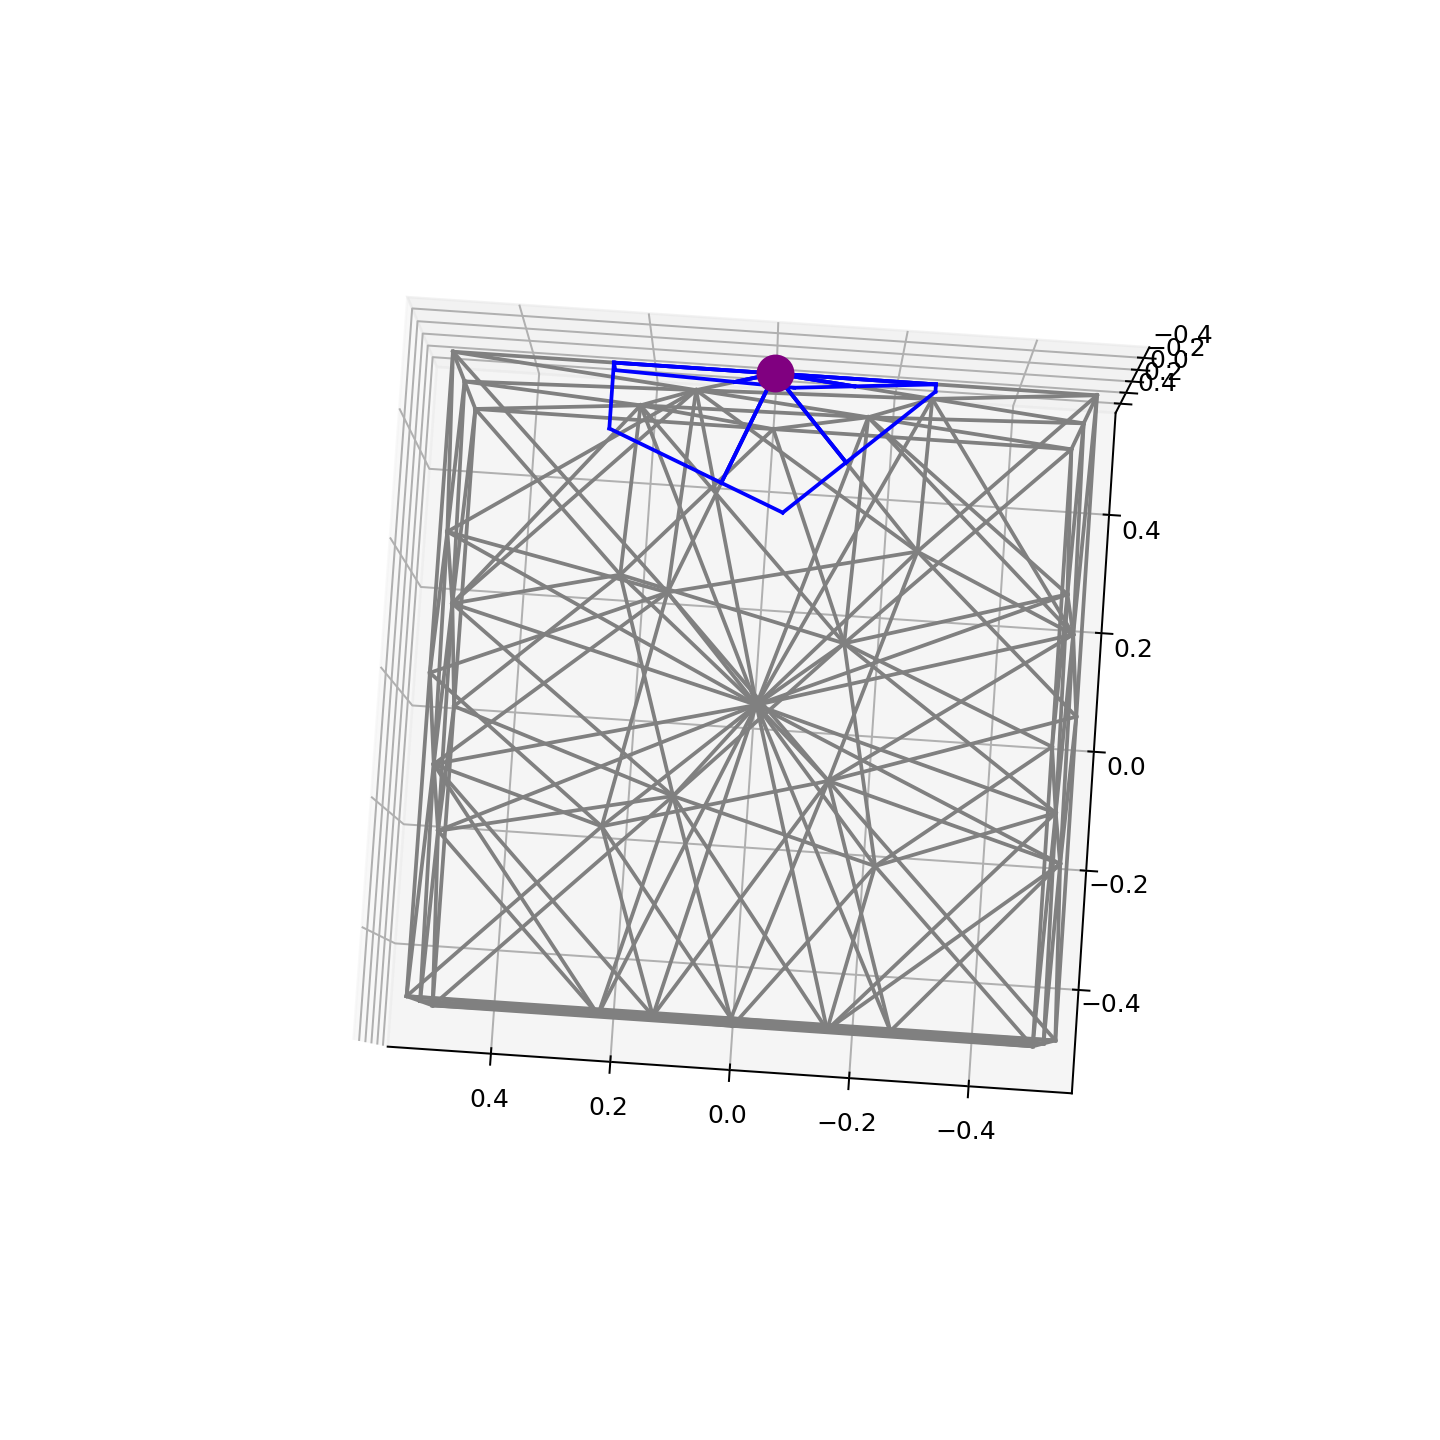

In [180]:
%matplotlib notebook
from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_size_inches(8, 8)
ax = plt.axes(projection='3d')

plot_node(ax, 15)

def plot_edge_bycoords(ax, edgestartcoords, edgeendcoords):
    ax.plot3D([edgestartcoords[0], edgeendcoords[0]], 
              [edgestartcoords[1], edgeendcoords[1]], 
              [edgestartcoords[2], edgeendcoords[2]], 
              c='grey')
    
for edge_id in edge_dict:
    start_node = edge_id[0]
    end_node = edge_id[1]
    start_coords = node_dict[start_node]
    end_coords = node_dict[end_node]
    plot_edge_bycoords(ax, start_coords, end_coords)
    
def plot_edge_bycoords(ax, edgestartcoords, edgeendcoords):
    ax.plot3D([edgestartcoords[0], edgeendcoords[0]], 
              [edgestartcoords[1], edgeendcoords[1]], 
              [edgestartcoords[2], edgeendcoords[2]], 
              c='blue')

for face in get_auxillary_dual_faces(15):
    for i in range(len(face)): #sanity check: len(face) should be 4
        start = i
        if i == len(face)-1:
            end = 0
        else:
            end = i+1
        plot_edge_bycoords(ax, face[start], face[end])

In [279]:
def get_boundary_dual_face(node_id, edge_id):
    """
    inputs: 
        - node id of a primal node 
        - edge id of primal face (array of int)
    output: boundary dual face corresponding to that primal edge (list of arrays of ints)
    """
    boundary_dual_face = []
    boundary_dual_face.append(get_midpoint(edge_nodes = edge_id)) # start at midpoint of edge
    
    # get boundary primal faces which contain that edge, there should be 2
    primal_face_candidates = []
    for primal_face in boundary_dual_edge_dict:
        primal_face_edges = set(itertools.combinations(primal_face, 2)) 
        if {edge_id}.issubset(primal_face_edges):
            primal_face_candidates.append(primal_face)
    
    primal_face_candidates.sort()
    primal_face_1 = primal_face_candidates[0]
    primal_face_2 = primal_face_candidates[1]
    
    boundary_dual_face.append(boundary_dual_edge_dict[primal_face_1]) # boundary dual node of face 1 in tet 1
    
    """
    If edge belongs to only one tet, then the next vertex is the dual volume of the tet
    Otherwise, if edge is shared between two or more tets, the next vertixes is the subloop of 
    
    """
    # list of all tets the edge passes through, and flip order if needed
    tets = get_dual_face(edge_id)
    print(tets)
    if face_dict[primal_face_1][0] != tets[0]: 
        tets = np.flip(tets)
    
    for tet in tets:
        dual_node = dual_node_dict[tet]
        boundary_dual_face.append(dual_node)
        
    # boundary dual node of face 2 in tet 2
    boundary_dual_face.append(boundary_dual_edge_dict[primal_face_2])
    
    return boundary_dual_face

def get_boundary_dual_faces(node_id):
    """
    input: node id of primal node (int)
    output: list of faces (list of list of arrays of ints)
    """
    # get which primal edges the vertex belongs to (this is an inefficient implementation)
    primal_edges = []
    for edge_id in edge_dict:
        if node_id in edge_id: 
            primal_edges.append(edge_id)
    print(primal_edges)
    
   # for each of the above primal edges, get the auxillary dual face containing the vertex
    boundary_dual_faces = []
    for primal_edge in primal_edges:
        boundary_dual_face = get_boundary_dual_face(node_id = node_id, edge_id = primal_edge)
        boundary_dual_faces.append(boundary_dual_face)
    return boundary_dual_faces

In [280]:
get_boundary_dual_face(node_id=12, edge_id=(12,21))

[124 208]


[array([-0.375, -0.5  , -0.125]),
 array([-0.5 , -0.5 , -0.25]),
 array([-0.5    , -0.46875, -0.25   ]),
 array([-0.27953339, -0.29727597, -0.02953339]),
 array([-0.27953339, -0.5       , -0.02953339])]

In [281]:
get_boundary_dual_faces(node_id=12)

[(12, 21), (12, 40), (12, 24), (12, 38), (1, 12), (4, 12)]
[124 208]
[124 152]
[124 152 187]
[152 187]
[187]
[208]


[[array([-0.375, -0.5  , -0.125]),
  array([-0.5 , -0.5 , -0.25]),
  array([-0.5    , -0.46875, -0.25   ]),
  array([-0.27953339, -0.29727597, -0.02953339]),
  array([-0.27953339, -0.5       , -0.02953339])],
 [array([-0.5     , -0.359375, -0.109375]),
  array([-0.5    , -0.46875, -0.25   ]),
  array([-0.28574108, -0.28645833, -0.015625  ]),
  array([-0.27953339, -0.29727597, -0.02953339]),
  array([-0.5       , -0.28645833, -0.015625  ])],
 [array([-0.32714844, -0.5       ,  0.07714844]),
  array([-0.40429688, -0.5       ,  0.25      ]),
  array([-0.40429688, -0.375     ,  0.25      ]),
  array([-0.28574108, -0.28645833, -0.015625  ]),
  array([-0.27953339, -0.29727597, -0.02953339]),
  array([-0.27953339, -0.5       , -0.02953339])],
 [array([-0.5   , -0.3125,  0.0625]),
  array([-0.5  , -0.375,  0.25 ]),
  array([-0.40429688, -0.375     ,  0.25      ]),
  array([-0.28574108, -0.28645833, -0.015625  ]),
  array([-0.5       , -0.28645833, -0.015625  ])],
 [array([-0.5 , -0.5 ,  0.25])

<IPython.core.display.Javascript object>


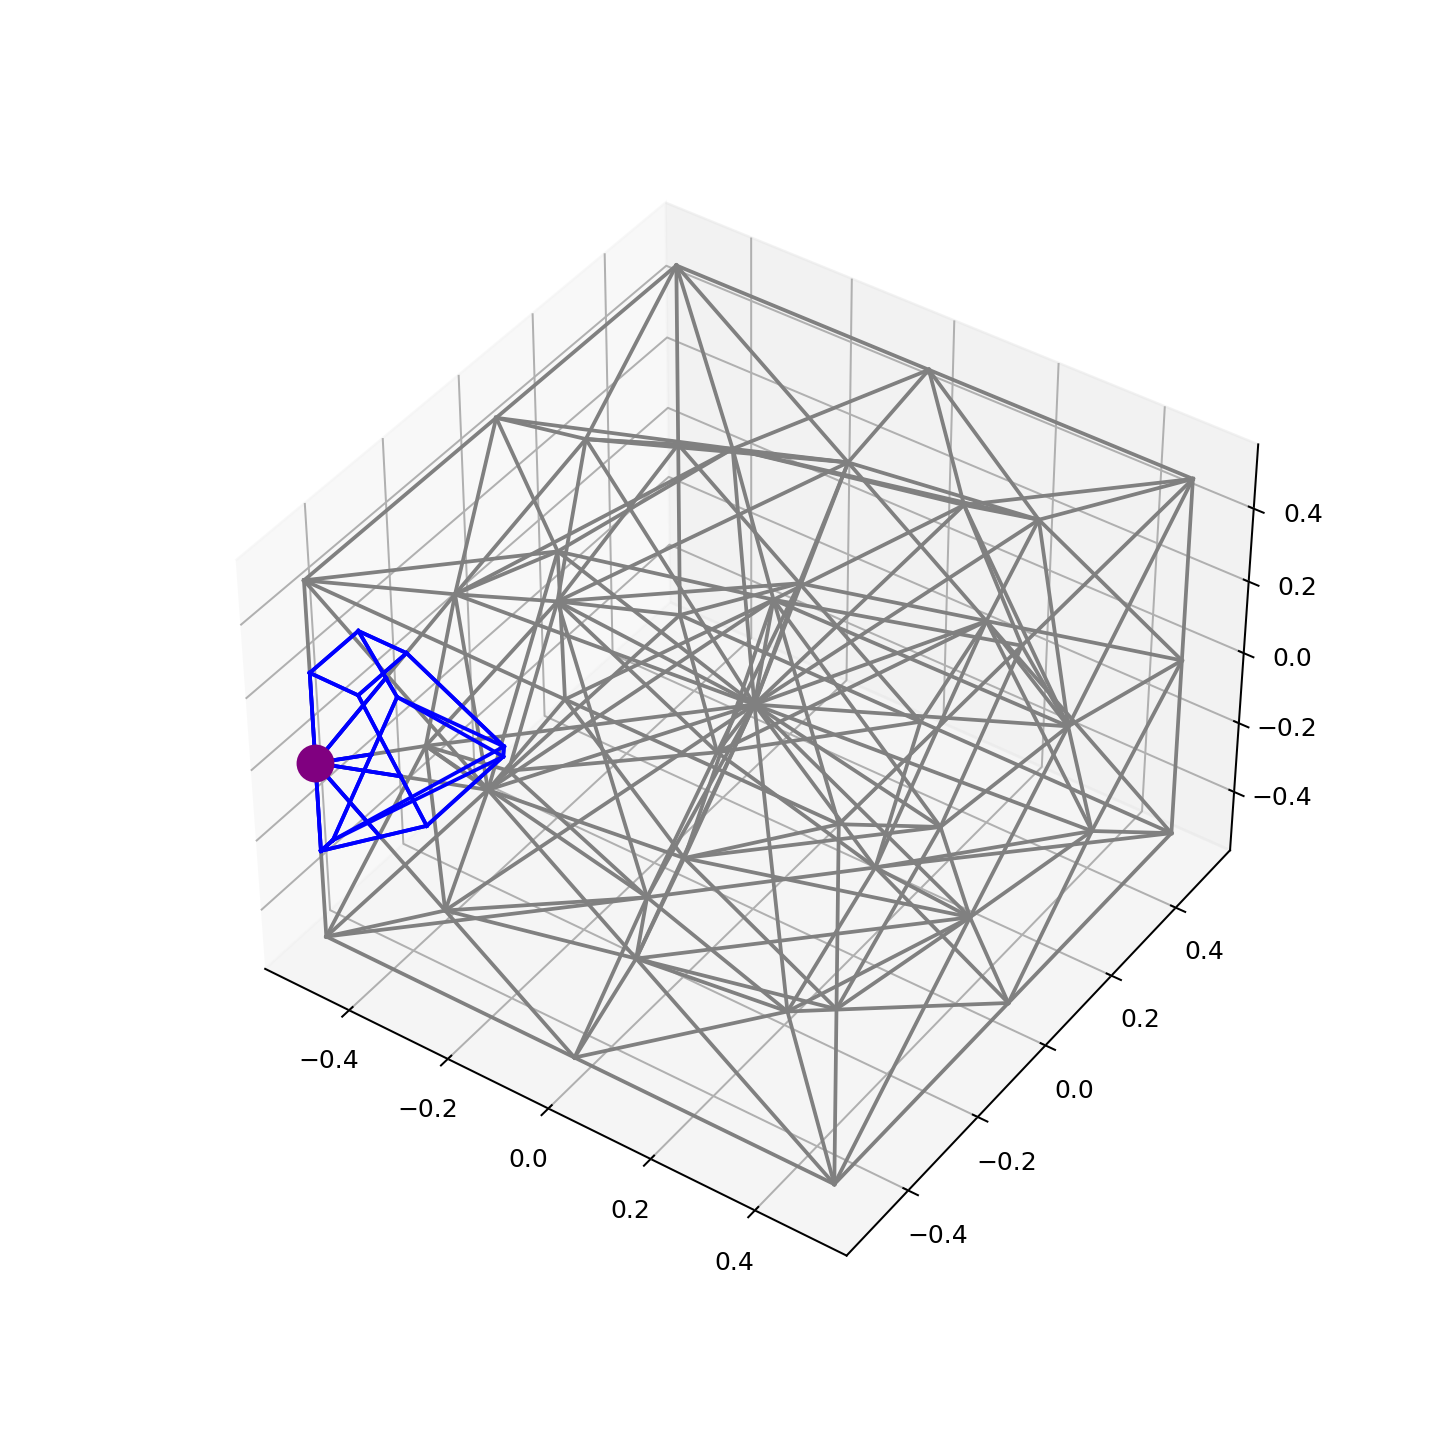

[(12, 21), (12, 40), (12, 24), (12, 38), (1, 12), (4, 12)]
[124 208]
[124 152]
[124 152 187]
[152 187]
[187]
[208]


In [292]:
%matplotlib notebook
from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_size_inches(8, 8)
ax = plt.axes(projection='3d')

plot_node(ax, 12)

def plot_edge_bycoords(ax, edgestartcoords, edgeendcoords):
    ax.plot3D([edgestartcoords[0], edgeendcoords[0]], 
              [edgestartcoords[1], edgeendcoords[1]], 
              [edgestartcoords[2], edgeendcoords[2]], 
              c='grey')
    
for edge_id in edge_dict:
    start_node = edge_id[0]
    end_node = edge_id[1]
    start_coords = node_dict[start_node]
    end_coords = node_dict[end_node]
    plot_edge_bycoords(ax, start_coords, end_coords)
    
def plot_edge_bycoords(ax, edgestartcoords, edgeendcoords):
    ax.plot3D([edgestartcoords[0], edgeendcoords[0]], 
              [edgestartcoords[1], edgeendcoords[1]], 
              [edgestartcoords[2], edgeendcoords[2]], 
              c='blue')

for face in get_auxillary_dual_faces(node_id=12):
    for i in range(len(face)): #sanity check: len(face) should be 4
        start = i
        if i == len(face)-1:
            end = 0
        else:
            end = i+1
        plot_edge_bycoords(ax, face[start], face[end])
        

for face in get_boundary_dual_faces(node_id=12):
    for i in range(len(face)): #sanity check: len(face) should be 4
        start = i
        if i == len(face)-1:
            end = 0
        else:
            end = i+1
        plot_edge_bycoords(ax, face[start], face[end])

#### Examples & Plotting

In [24]:
# function to plot a single node
def plot_node(ax, node_id):
    nodecoords = node_dict[node_id]
    ax.scatter(nodecoords[0], nodecoords[1], nodecoords[2], c='purple', s=200)

# function to plot a single edge
def plot_edge(ax, edge_id):
    """
    edge_id is a tuple
    """
    edgestartcoords = node_dict[edge_id[0]]
    edgeendcoords = node_dict[edge_id[1]]
    # create parameterization between endpoints using parameter t
    t_array = np.linspace(0, 1, 50)
    for t in t_array:
        point = t*edgestartcoords + (1-t)*edgeendcoords
        ax.scatter(point[0], point[1], point[2], c='black', s=20)
        
# function to plot a single face
def plot_face(ax, face_id):
    for node in face_id:
        plot_node(ax, node)
    edges = list(itertools.combinations(face_id, 2))
    for edge in edges:
        edge = np.array(edge)
        start_id = edge[0]
        end_id = edge[1]
        plot_edge(ax, (start_id, end_id))

# function to plot a single tetrahedron
def plot_tetrahedron(ax, tetrahedron_id):
    # get node ids
    tetrahedron_nodes = tetrahedron_dict[tetrahedron_id]
    # plot nodes
    for node in tetrahedron_nodes:
        plot_node(ax, node)
    # plot edges
    edges = list(itertools.combinations(tetrahedron_nodes, 2))
    for edge in edges:
        edge = np.array(edge)
        start_id = edge[0]
        end_id = edge[1]
        plot_edge(ax, (start_id, end_id))

In [25]:
######### HELPER FUNCTIONS #########
def plot_node_bycoords(ax, nodecoords):
    ax.scatter(nodecoords[0], nodecoords[1], nodecoords[2], c='purple', s=200)
    
def plot_edge_bycoords(ax, edgestartcoords, edgeendcoords):
    # create parameterization between endpoints using parameter t
    t_array = np.linspace(0, 1, 50)
    for t in t_array:
        point = t*edgestartcoords + (1-t)*edgeendcoords
        ax.scatter(point[0], point[1], point[2], c='grey', s=20)

####################################
def plot_dual_node(ax, tetrahedron_id):
    dualnode_coords = dual_node_dict[tetrahedron_id]
    ax.scatter(dualnode_coords[0], dualnode_coords[1], dualnode_coords[2], c='blue', s=200)

def plot_dual_edge(ax, face_id):
    dual_edge_tetrahedrons = dual_edge_dict[face_id]
    for dual_edge_tetrahedron in dual_edge_tetrahedrons:
        plot_dual_node(ax, dual_edge_tetrahedron)
    
    start = dual_node_dict[dual_edge_tetrahedrons[0]] # this part is poorly written
    end = dual_node_dict[dual_edge_tetrahedrons[1]]
    plot_edge_bycoords(ax, start, end) 

def plot_dual_face(ax, edge_id):
    dual_edge_tetrahedrons = dual_face_dict[edge_id]
    for i in range(len(dual_edge_tetrahedrons)):
        
        plot_dual_node(ax, dual_edge_tetrahedrons[i])     
        
        start = dual_node_dict[dual_edge_tetrahedrons[i]] # this part is poorly written
        
        if i == len(dual_edge_tetrahedrons)-1: 
            end = dual_node_dict[dual_edge_tetrahedrons[0]]
        else:
            end = dual_node_dict[dual_edge_tetrahedrons[i+1]]
        
        plot_edge_bycoords(ax, start, end)

#### plotting primal and dual edges purely by plotting edges

<IPython.core.display.Javascript object>


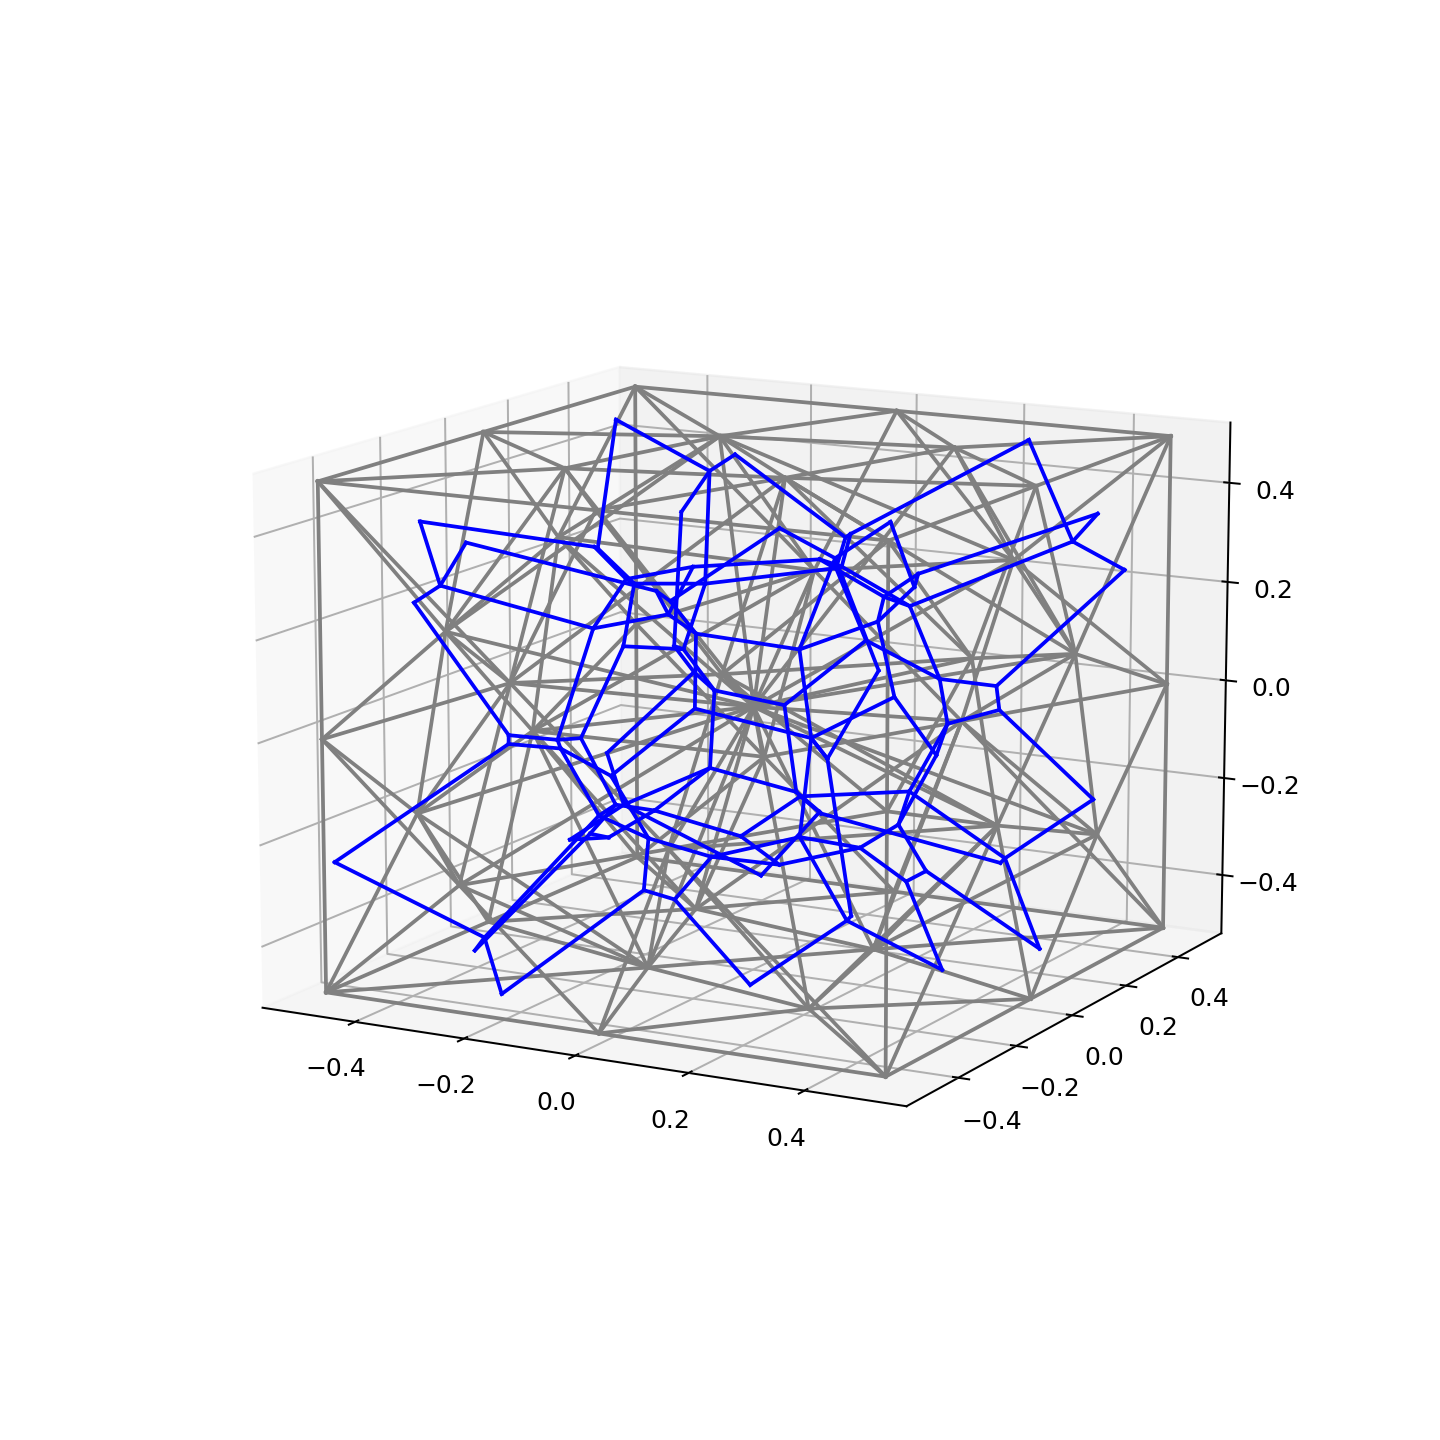

In [232]:
%matplotlib notebook
from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_size_inches(8, 8)
ax = plt.axes(projection='3d')

def plot_edge_bycoords(ax, edgestartcoords, edgeendcoords):
    ax.plot3D([edgestartcoords[0], edgeendcoords[0]], 
              [edgestartcoords[1], edgeendcoords[1]], 
              [edgestartcoords[2], edgeendcoords[2]], 
              c='grey')

for edge_id in edge_dict:
    start_node = edge_id[0]
    end_node = edge_id[1]
    start_coords = node_dict[start_node]
    end_coords = node_dict[end_node]
    plot_edge_bycoords(ax, start_coords, end_coords)
    
def plot_edge_bycoords(ax, edgestartcoords, edgeendcoords):
    ax.plot3D([edgestartcoords[0], edgeendcoords[0]], 
              [edgestartcoords[1], edgeendcoords[1]], 
              [edgestartcoords[2], edgeendcoords[2]], 
              c='blue')
    
# faces = dual_volume_dict[45]
# for face in faces:
#     for i in range(len(face)):
#         start = dual_node_dict[face[i]]
#         if i == len(face)-1:
#             end = dual_node_dict[face[0]]
#         else:
#             end = dual_node_dict[face[i+1]]
#         plot_edge_bycoords(ax, start, end)
    
for dual_edge_tets in dual_edge_dict.values():
    start_tet = dual_edge_tets[0]
    end_tet = dual_edge_tets[1]
    start_coords = dual_node_dict[start_tet]
    end_coords = dual_node_dict[end_tet]
    plot_edge_bycoords(ax, start_coords, end_coords)

def plot_edge_bycoords(ax, edgestartcoords, edgeendcoords):
    ax.plot3D([edgestartcoords[0], edgeendcoords[0]], 
              [edgestartcoords[1], edgeendcoords[1]], 
              [edgestartcoords[2], edgeendcoords[2]], 
              c='purple')

# for boundary_node in boundary_dual_edge_dict:
#     start_coords = dual_node_dict[face_dict[boundary_node][0]]
#     end_coords = boundary_dual_edge_dict[boundary_node]
#     plot_edge_bycoords(ax, start_coords, end_coords)